### Low rank approximation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import the data, covert that into a convenient data
PATH= '/home/ac-optimus/data_science/recommendation_sys/ratings_small.csv'
df = pd.read_csv(PATH, sep= ",") # taking 100000 user-movie rating tuples
# df = pd.read_csv(PATH, sep= ",")
df.shape

(100004, 4)

In [5]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [6]:
# shuffling the data
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
df.head()

,userId,movieId,rating
98872,664,2858,4.0
4932,26,60684,5.0
8011,50,357,4.0
1859,15,4890,3.0
48608,355,5445,3.5


In [8]:
# train - 80% of the data.
num_rows = df.shape[0]
train, test = df.copy(deep = True), df[int(num_rows*0.8):].copy(deep = True)
train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0
train = shuffle(train)

In [9]:
# creating user-movie rating utility matrix
user_movie_rating =train.groupby(['userId','movieId'])['rating'].max().unstack().fillna(0)
user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



- Null values replaced  with zeros

In [13]:
def low_rank_k(rank, u, s, v):
    # SVD 
    u_new = u[:,:rank]
    v_new = v[:rank, :]
    s_new = s[:rank]
    singular_mat = np.diag(s_new)
    low_rank_mat = np.dot(np.dot(u_new, singular_mat), v_new)
    return low_rank_mat

In [14]:
def error(y_hat, y):
    # MSE
    y_hat = np.array(y_hat)
    y = np.array(y)
    MSE_ = (y_hat- y)**2
    MSE = MSE_.sum()/len(y_hat)
    return MSE

In [15]:
# computing error and the graph
u, s, v = np.linalg.svd(user_movie_rating, full_matrices=False)
y= test['rating']
errors = []
for k in range(0, 60):
    Pred = low_rank_k(k, u, s, v)
    Pred = pd.DataFrame(Pred, columns=user_movie_rating.columns, index= user_movie_rating.index)
    y_hat = [Pred.loc[int(test.iloc[i]['userId']), int(test.iloc[i]['movieId'])] 
             for i in range(len(test))]    
    error_i = error(y_hat, y)
    errors.append(error_i)

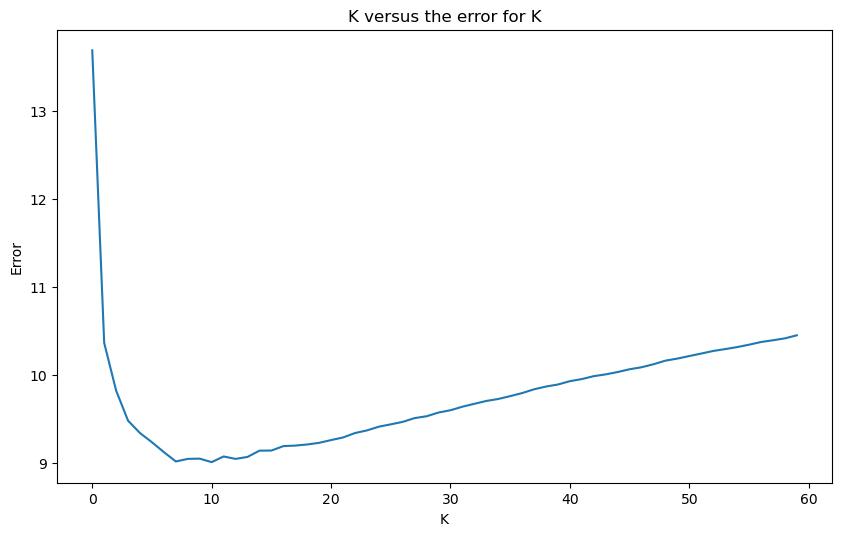

In [16]:
# plot
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(np.array(errors));
plt.xlabel('K')
plt.ylabel('Error');
plt.title('K versus the error for K');